In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

In [49]:
df_nassUSDA = pd.read_csv("Datasets/NASS_USDA/FFFD6900-27F3-3E24-A627-FC347BA73EAE.csv", \
                          header=0)
df_nassUSDA.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2012,YEAR,NaN,STATE,FLORIDA,12,NaN,NaN,NaN,...,NaN,NaN,0,NaN,SUGARCANE,"SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"13,574,853",4.3
1,CENSUS,2012,YEAR,NaN,STATE,HAWAII,15,NaN,NaN,NaN,...,NaN,NaN,0,NaN,SUGARCANE,"SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,(D),(D)
2,CENSUS,2012,YEAR,NaN,STATE,LOUISIANA,22,NaN,NaN,NaN,...,NaN,NaN,0,NaN,SUGARCANE,"SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"13,853,665",2.5
3,CENSUS,2012,YEAR,NaN,STATE,TEXAS,48,NaN,NaN,NaN,...,NaN,NaN,0,NaN,SUGARCANE,"SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,(D),(D)
4,CENSUS,2007,YEAR,NaN,STATE,FLORIDA,12,NaN,NaN,NaN,...,NaN,NaN,0,NaN,SUGARCANE,"SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",TOTAL,NOT SPECIFIED,"14,127,121",NaN


In [50]:
df_nassUSDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 21 columns):
Program             701 non-null object
Year                701 non-null int64
Period              701 non-null object
Week Ending         0 non-null float64
Geo Level           701 non-null object
State               701 non-null object
State ANSI          701 non-null int64
Ag District         0 non-null float64
Ag District Code    0 non-null float64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      701 non-null int64
Watershed           0 non-null float64
Commodity           701 non-null object
Data Item           701 non-null object
Domain              701 non-null object
Domain Category     701 non-null object
Value               701 non-null object
CV (%)              4 non-null object
dtypes: float64(8), int64(3), object(10)
memory usage: 115.1+ KB


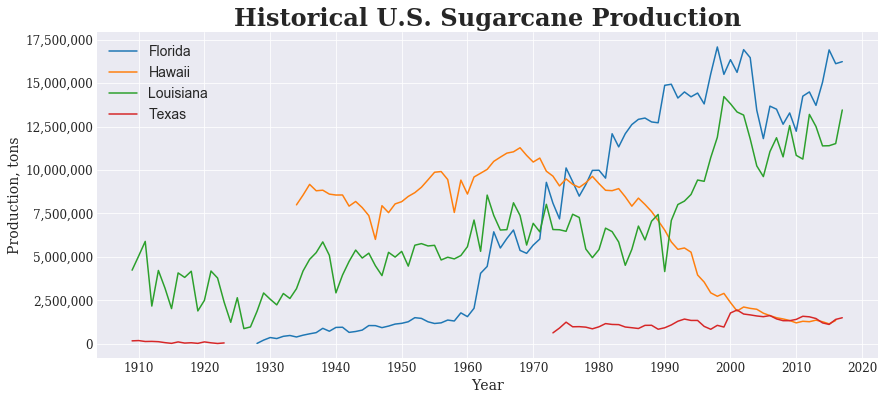

In [52]:
df_tons = df_nassUSDA[["Program", "Year", "Period", "State", "Data Item", "Value"]] \
    [(df_nassUSDA["Data Item"] == "SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS") \
     & (df_nassUSDA["Program"] == "SURVEY") \
     & (df_nassUSDA["Period"] == "YEAR")] \
    .sort_values(["Year", "State"])
df_tons.Value = df_tons.Value.str.replace(',', '').astype("int64")

df_tons_pivot = df_tons.pivot_table(index="Year", columns="State", values="Value")

# Generate a static plot using Seaborn and matplotlib
sns.set_style("darkgrid")
plt.plot(df_tons_pivot.index, df_tons_pivot[["FLORIDA", "HAWAII", "LOUISIANA", "TEXAS"]])
plt.title("Historical U.S. Sugarcane Production", fontsize=24, fontweight="bold", family="serif")
plt.xlabel("Year", fontsize=14, family="serif")
plt.ylabel("Production, tons", fontsize=14, family="serif")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
xrange = [x for x in range(1900,2030,10)]
plt.gca().xaxis.set_major_locator(plt.FixedLocator(xrange))
plt.xticks(fontsize=12, family="serif")
plt.yticks(fontsize=12, family="serif")
plt.gcf().set_size_inches(14,6)
plt.legend(["Florida","Hawaii","Louisiana","Texas"], loc="best", fontsize=14)
plt.show()

# Generate an interactive plot using the plotly package
# layout = go.Layout(
#     plot_bgcolor="rgb(247,247,247)",
#     legend=dict(font=dict(family="serif", size=12)),
#     title="<b>Historical U.S. Sugarcane Production</b>",
#     titlefont=dict(family="serif", size=24),
#     yaxis=dict(title="<b>Production, tons</b>", titlefont=dict(family="serif", size=14), 
#                tickfont=dict(family="serif", size=14)),
#     xaxis=dict(title="<b>Year</b>", titlefont=dict(family="serif", size=14), 
#                tickfont=dict(family="serif", size=14))
# )

# trace1 = go.Scatter(
#     x=df_tons_pivot.index,
#     y=df_tons_pivot["FLORIDA"],
#     mode='lines+markers',
#     name="Florida"
# )

# trace2 = go.Scatter(
#     x=df_tons_pivot.index,
#     y=df_tons_pivot["HAWAII"],
#     mode='lines+markers',
#     name="Hawaii"
# )

# trace3 = go.Scatter(
#     x=df_tons_pivot.index,
#     y=df_tons_pivot["LOUISIANA"],
#     mode='lines+markers',
#     name="Louisiana"
# )

# trace4 = go.Scatter(
#     x=df_tons_pivot.index,
#     y=df_tons_pivot["TEXAS"],
#     mode='lines+markers',
#     name="Texas"
# )

# fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
# py.iplot(fig)